# 線性迴歸

http://ithelp.ithome.com.tw/articles/10186905

# scikit-learn

Python 機器學習套件是 scikit-learn，它建構於 NumPy、SciPy 與 matplotlib 之上，是開源套件並可作為商業使用。

http://ithelp.ithome.com.tw/articles/10186905

## 我們從 scikit-learn 套件的首頁可以一目瞭然它的應用領域：

http://scikit-learn.org/stable/index.html

+ 監督式學習（Supervised learning）

>分類（Classification）

>迴歸（Regression）

+ 非監督式學習（Unsupervised learning）

>分群（Clustering）

+ 降維（Dimensionality reduction）

+ 模型選擇（Model selection）

+ 預處理（Preprocessing）


我們使用 sklearn 的 datasets 物件的 load_iris() 方法來讀入鳶尾花資料。

In [36]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print(type(iris.data)) # 資料是儲存為 ndarray
print(iris.feature_names) # 變數名稱可以利用 feature_names 屬性取得
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names) # 轉換為 data frame
iris_df.ix[:, "species"] = iris.target # 將品種加入 data frame
iris_df.head() # 觀察前五個觀測值

<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# 建立線性迴歸分析模型

世界第一簡單統計學迴歸分析篇的一個簡單例子：用氣溫來預測冰紅茶的銷售量。

http://www.books.com.tw/products/0010479438

我們使用 sklearn.linear_model 的 LinearRegression() 方法。

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

# 轉換維度
temperatures = np.reshape(temperatures, (len(temperatures), 1))
iced_tea_sales = np.reshape(iced_tea_sales, (len(iced_tea_sales), 1))

lm = LinearRegression()
lm.fit(temperatures, iced_tea_sales)

# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_)

[[ 3.73788546]]
[-36.36123348]


# 利用線性迴歸分析模型預測

建立線性迴歸模型之後，身為冰紅茶店的老闆，就可以開始量測氣溫，藉此來預測冰紅茶銷量，更精準地掌握原料的管理。

我們使用 LinearRegression() 的 predict() 方法。

In [38]:
# 新的氣溫
to_be_predicted = np.array([30])
predicted_sales = lm.predict(to_be_predicted)

# 預測的冰紅茶銷量
print(predicted_sales)

[[ 75.7753304]]


C:\Users\po390\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# 線性迴歸視覺化

http://ithelp.ithome.com.tw/articles/10186484

我們可以使用 [第 18 天] 資料視覺化 matplotlib 提過的 Python matplotlib 套件

我們使用 matplotlib.pyplot 的 scatter() 與 plot() 方法。


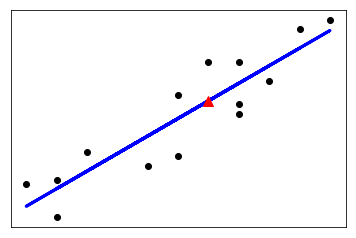

In [39]:
import matplotlib.pyplot as plt

%matplotlib inline

# 視覺化
plt.scatter(temperatures, iced_tea_sales, color='black')  #散點圖
plt.plot(temperatures, lm.predict(np.reshape(temperatures, (len(temperatures), 1))), color='blue', linewidth=3) #回歸線

plt.plot(to_be_predicted, predicted_sales, color = 'red', marker = '^', markersize = 10) #標示新的預測
plt.xticks(())
plt.yticks(())
plt.show()

# 線性迴歸模型的績效

線性迴歸模型的績效（Performance）有 Mean squared error（MSE）與 R-squared。

In [40]:
# 模型績效
mse = np.mean((lm.predict(temperatures) - iced_tea_sales) ** 2)
r_squared = lm.score(temperatures, iced_tea_sales)

# 印出模型績效
print(mse)
print(r_squared)

27.9348646948
0.822509288117
